In [1]:
import os
import sys

sys.path.append(os.path.join(os.getcwd(), ".."))

In [2]:
from torch import nn
from torch.utils.data import DataLoader
import torch
import torch.optim as optim
from notebooks.helpers import PreprocessingDataframe,EmbeddingModel,MELDDataset,CrossAttentionTextEnrichmentModel


/Users/marcofura/anaconda3/envs/deep_learning_avanzado/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import pandas as pd

# Load the CSV file into a DataFrame
pathname = '../datasets/MELD.Raw/dev_sent_emo.csv'
pathname_train = '../datasets/MELD.Raw/train/train_sent_emo.csv'
df = pd.read_csv(pathname)

In [4]:
embedding_model = EmbeddingModel()

In [5]:
preprocessing = PreprocessingDataframe(df,folder_audio_path='../datasets/MELD.Raw/dev_splits_complete')

In [6]:
# solo cuando ya están generados los wav_files
preprocessing.set_path_wavfiles()

In [7]:
preprocessing.generate_wavfiles_from_df()

Extracted audio for row 0
Extracted audio for row 1
Extracted audio for row 2
Extracted audio for row 3
Extracted audio for row 4
Extracted audio for row 5
Extracted audio for row 6
Extracted audio for row 7
Extracted audio for row 8
Extracted audio for row 9
Extracted audio for row 10
Extracted audio for row 11
Extracted audio for row 12
Extracted audio for row 13
Extracted audio for row 14
Extracted audio for row 15
Extracted audio for row 16
Extracted audio for row 17
Extracted audio for row 18
Extracted audio for row 19
Extracted audio for row 20
Extracted audio for row 21
Extracted audio for row 22
Extracted audio for row 23
Extracted audio for row 24
Extracted audio for row 25
Extracted audio for row 26
Extracted audio for row 27
Extracted audio for row 28
Extracted audio for row 29
Extracted audio for row 30
Extracted audio for row 31
Extracted audio for row 32
Extracted audio for row 33
Extracted audio for row 34
Extracted audio for row 35
Extracted audio for row 36
Extracted a

In [7]:
preprocessing.drop_na()

In [8]:
row_data = preprocessing.df.iloc[0]

In [9]:
embedding_audio=embedding_model.embed_audio(row_data['wav_file'])

Sample rate: 48000
Waveform shape before: torch.Size([6, 134144])
Bundle sample rate: 16000
Waveform shape: torch.Size([1, 44715])


In [10]:
embedding_text=embedding_model.embed_text(row_data['Utterance'])

Input type: <class 'transformers.tokenization_utils_base.BatchEncoding'>
Inputs Shape: torch.Size([1, 17])


In [11]:
embedding_audio.shape

torch.Size([1, 139, 768])

In [13]:
preprocessing.add_embeddings(embedding_model)

Generating audio embeddings for  ../datasets/MELD.Raw/train/train_splits/dia0_utt0.wav
Sample rate: 48000
Waveform shape before: torch.Size([2, 272384])
Bundle sample rate: 16000
Waveform shape: torch.Size([1, 90795])
before saving in DF <class 'torch.Tensor'>
Generating text embeddings for  also I was the point person on my companys transition from the KL-5 to GR-6 system.
Input type: <class 'transformers.tokenization_utils_base.BatchEncoding'>
Inputs Shape: torch.Size([1, 25])
before saving in DF  <class 'torch.Tensor'>
Generating audio embeddings for  ../datasets/MELD.Raw/train/train_splits/dia0_utt1.wav
Sample rate: 48000
Waveform shape before: torch.Size([2, 70656])
Bundle sample rate: 16000
Waveform shape: torch.Size([1, 23552])
before saving in DF <class 'torch.Tensor'>
Generating text embeddings for  You mustve had your hands full.
Input type: <class 'transformers.tokenization_utils_base.BatchEncoding'>
Inputs Shape: torch.Size([1, 10])
before saving in DF  <class 'torch.Tens

In [14]:
preprocessing.df.head()

Sr No.                                          Utterance          Speaker  \
0     1.0  also I was the point person on my companys tr...         Chandler   
1     2.0                   You mustve had your hands full.  The Interviewer   
2     3.0                            That I did. That I did.         Chandler   
3     4.0      So lets talk a little bit about your duties.  The Interviewer   
4     5.0                             My duties?  All right.         Chandler   

    Emotion Sentiment  Dialogue_ID  Utterance_ID  Season  Episode  \
0   neutral   neutral          0.0           0.0     8.0     21.0   
1   neutral   neutral          0.0           1.0     8.0     21.0   
2   neutral   neutral          0.0           2.0     8.0     21.0   
3   neutral   neutral          0.0           3.0     8.0     21.0   
4  surprise  positive          0.0           4.0     8.0     21.0   

      StartTime       EndTime  \
0  00:16:16,059  00:16:21,731   
1  00:16:21,940  00:16:23,442   
2  00:16:23,442  00:16:26,389   
3  00:16:26,820  00:16:29,572   
4  00:16:34,452  00:16:40,917   

                                            wav_file  \
0  ../datasets/MELD.Raw/train/train_splits/dia0_u...   
1  ../datasets/MELD.Raw/train/train_splits/dia0_u...   
2  ../datasets/MELD.Raw/train/train_splits/dia0_u...   
3  ../datasets/MELD.Raw/train/train_splits/dia0_u...   
4  ../datasets/MELD.Raw/train/train_splits/dia0_u...   

                                    audio_embeddings  \
0  [[[tensor(0.7197), tensor(0.2071), tensor(0.16...   
1  [[[tensor(0.3258), tensor(0.3197), tensor(0.22...   
2  [[[tensor(0.3290), tensor(0.2848), tensor(0.28...   
3  [[[tensor(0.1626), tensor(0.2257), tensor(0.11...   
4  [[[tensor(0.3432), tensor(-0.0450), tensor(0.4...   

                                     text_embeddings  
0  [[[tensor(-0.1967), tensor(0.1299), tensor(0.1...  
1  [[[tensor(0.0635), tensor(0.3604), tensor(-0.5...  
2  [[[tensor(-0.0813), tensor(0.3107), tensor(0.0...  
3  [[[tensor(0.2643), tensor(-0.0081), tensor(-0....  
4  [[[tensor(0.0289), tensor(0.3380), tensor(-0.0...

In [15]:
preprocessing.drop_na()

In [16]:
preprocessing.add_label_encoder_to_emotion()

In [17]:
preprocessing.df.head()

Sr No.                                          Utterance          Speaker  \
0     1.0  also I was the point person on my companys tr...         Chandler   
1     2.0                   You mustve had your hands full.  The Interviewer   
2     3.0                            That I did. That I did.         Chandler   
3     4.0      So lets talk a little bit about your duties.  The Interviewer   
4     5.0                             My duties?  All right.         Chandler   

    Emotion Sentiment  Dialogue_ID  Utterance_ID  Season  Episode  \
0   neutral   neutral          0.0           0.0     8.0     21.0   
1   neutral   neutral          0.0           1.0     8.0     21.0   
2   neutral   neutral          0.0           2.0     8.0     21.0   
3   neutral   neutral          0.0           3.0     8.0     21.0   
4  surprise  positive          0.0           4.0     8.0     21.0   

      StartTime       EndTime  \
0  00:16:16,059  00:16:21,731   
1  00:16:21,940  00:16:23,442   
2  00:16:23,442  00:16:26,389   
3  00:16:26,820  00:16:29,572   
4  00:16:34,452  00:16:40,917   

                                            wav_file  \
0  ../datasets/MELD.Raw/train/train_splits/dia0_u...   
1  ../datasets/MELD.Raw/train/train_splits/dia0_u...   
2  ../datasets/MELD.Raw/train/train_splits/dia0_u...   
3  ../datasets/MELD.Raw/train/train_splits/dia0_u...   
4  ../datasets/MELD.Raw/train/train_splits/dia0_u...   

                                    audio_embeddings  \
0  [[[tensor(0.7197), tensor(0.2071), tensor(0.16...   
1  [[[tensor(0.3258), tensor(0.3197), tensor(0.22...   
2  [[[tensor(0.3290), tensor(0.2848), tensor(0.28...   
3  [[[tensor(0.1626), tensor(0.2257), tensor(0.11...   
4  [[[tensor(0.3432), tensor(-0.0450), tensor(0.4...   

                                     text_embeddings  emotion  
0  [[[tensor(-0.1967), tensor(0.1299), tensor(0.1...        4  
1  [[[tensor(0.0635), tensor(0.3604), tensor(-0.5...        4  
2  [[[tensor(-0.0813), tensor(0.3107), tensor(0.0...        4  
3  [[[tensor(0.2643), tensor(-0.0081), tensor(-0....        4  
4  [[[tensor(0.0289), tensor(0.3380), tensor(-0.0...        6

In [18]:
row_data['Utterance']

'also I was the point person on my company\x92s transition from the KL-5 to GR-6 system.'

In [19]:
preprocessing.save_embeddings('df_train_embeddings.pkl')

In [6]:
preprocessing.load_embeddings('df_embeddings.pkl')

In [7]:
preprocessing.df.head()

Sr No.                                          Utterance   Speaker  \
0     1.0     Oh my God, hes lost it. Hes totally lost it.    Phoebe   
1     2.0                                              What?    Monica   
2     3.0  Or! Or, we could go to the bank, close our acc...      Ross   
3     4.0                                   Youre a genius!  Chandler   
4     5.0            Aww, man, now we wont be bank buddies!      Joey   

    Emotion Sentiment  Dialogue_ID  Utterance_ID  Season  Episode  \
0   sadness  negative          0.0           0.0     4.0      7.0   
1  surprise  negative          0.0           1.0     4.0      7.0   
2   neutral   neutral          1.0           0.0     4.0      4.0   
3       joy  positive          1.0           1.0     4.0      4.0   
4   sadness  negative          1.0           2.0     4.0      4.0   

      StartTime       EndTime  \
0  00:20:57,256  00:21:00,049   
1  00:21:01,927  00:21:03,261   
2  00:12:24,660  00:12:30,915   
3  00:12:32,334  00:12:33,960   
4  00:12:34,211  00:12:37,505   

                                            wav_file  \
0  ../datasets/MELD.Raw/dev_splits_complete/dia0_...   
1  ../datasets/MELD.Raw/dev_splits_complete/dia0_...   
2  ../datasets/MELD.Raw/dev_splits_complete/dia1_...   
3  ../datasets/MELD.Raw/dev_splits_complete/dia1_...   
4  ../datasets/MELD.Raw/dev_splits_complete/dia1_...   

                                    audio_embeddings  \
0  [[[tensor(0.3743), tensor(0.2285), tensor(0.38...   
1  [[[tensor(0.1852), tensor(0.0799), tensor(0.26...   
2  [[[tensor(-0.0054), tensor(0.0626), tensor(0.2...   
3  [[[tensor(0.4315), tensor(0.1759), tensor(0.22...   
4  [[[tensor(0.3040), tensor(0.0519), tensor(0.49...   

                                     text_embeddings  emotion  
0  [[[tensor(-0.4690), tensor(-0.0323), tensor(-0...        5  
1  [[[tensor(-0.0302), tensor(0.2743), tensor(-0....        6  
2  [[[tensor(0.0823), tensor(0.0437), tensor(-0.0...        4  
3  [[[tensor(0.0492), tensor(0.4535), tensor(-0.3...        3  
4  [[[tensor(0.2168), tensor(0.5973), tensor(-0.2...        5

In [8]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(preprocessing.df, test_size=0.2, random_state=42)


In [9]:
meld_dataset = MELDDataset(train_df[['audio_embeddings','text_embeddings','emotion']])
meld_dataset_val = MELDDataset(val_df[['audio_embeddings','text_embeddings','emotion']])


In [48]:
for i in range(2):
    row_data = meld_dataset[i]
    print(row_data[0].shape)
    print(row_data[1].shape)
    print(row_data[2])

torch.Size([1, 7, 768])
torch.Size([1, 56, 768])
tensor(4)
torch.Size([1, 5, 768])
torch.Size([1, 65, 768])
tensor(4)


In [10]:
from torch.nn.utils.rnn import pad_sequence

In [11]:
def collate_fn_with_padding(batch):
    """
    Función de collate para manejar datos de texto y audio con diferentes longitudes.
    """
    text_embeddings, audio_embeddings, labels = zip(*batch)
    
    # Eliminar dimensiones innecesarias (e.g., de [1, seq_len, 768] a [seq_len, 768])
    text_embeddings = [t.squeeze(0) for t in text_embeddings]
    audio_embeddings = [a.squeeze(0) for a in audio_embeddings]

    # Padding para texto
    text_padded = pad_sequence(text_embeddings, batch_first=True)  # (batch_size, max_text_len, 768)
    text_mask = (text_padded.sum(dim=-1) != 0).float()  # Máscara de texto (1 donde hay datos reales, 0 en padding)

    # Padding para audio
    audio_padded = pad_sequence(audio_embeddings, batch_first=True)  # (batch_size, max_audio_len, 768)
    audio_mask = (audio_padded.sum(dim=-1) != 0).float()  # Máscara de audio

    # Convertir etiquetas a tensor
    labels = torch.tensor(labels)

    return text_padded, audio_padded, labels, text_mask, audio_mask

In [12]:
train_loader = DataLoader(meld_dataset, batch_size=16, shuffle=True,collate_fn=collate_fn_with_padding)


In [13]:
val_loader = DataLoader(meld_dataset_val, batch_size=16, shuffle=True,collate_fn=collate_fn_with_padding)


In [14]:
for batch in train_loader:
    print('Batch')
    text_embeddings, audio_embeddings, labels,text_mask,audio_mask = batch
    print(text_embeddings.shape)
    print(audio_embeddings.shape)
    print(labels)
    print(text_mask)
    print(audio_mask)
    break
    

Batch
torch.Size([16, 25, 768])
torch.Size([16, 319, 768])
tensor([5, 6, 0, 0, 6, 6, 4, 4, 2, 4, 4, 3, 4, 3, 5, 3])
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.

/Users/marcofura/Desktop/maestria/DeepLearningAvanzado/proyecto-final/notebooks/../notebooks/helpers/data_loader.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  text_embedding = torch.tensor(self.dataframe.iloc[idx]["text_embeddings"], dtype=torch.float32)
/Users/marcofura/Desktop/maestria/DeepLearningAvanzado/proyecto-final/notebooks/../notebooks/helpers/data_loader.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  audio_embedding = torch.tensor(self.dataframe.iloc[idx]["audio_embeddings"], dtype=torch.float32)


In [18]:
from torch.optim.lr_scheduler import ReduceLROnPlateau


In [19]:
history = {
    'train_loss': [],
    'train_acc': [],
    'val_loss': [],
    'val_acc': []
}
# Definir el dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Inicializar el modelo
model = CrossAttentionTextEnrichmentModel(
    bert_embedding_dim=768, 
    audio_embedding_dim=768, 
    lstm_hidden_dim=256, 
    num_classes=7
)
model.to(device)

# Definir el optimizador y la función de pérdida
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)
criterion = nn.CrossEntropyLoss()


epochs = 80
# Entrenar el modelo
for epoch in range(epochs):  
    model.train()
    epoch_loss = 0.0
    correct = 0
    total = 0
    print('Epoch: ', epoch+1)
    # for batch in train_loader:
    #     text_embeddings, audio_embeddings, labels, text_mask, audio_mask = batch
    #     text_embeddings, audio_embeddings, labels = (
    #         text_embeddings.to(device),
    #         audio_embeddings.to(device),
    #         labels.to(device)
    #     )
    #     text_mask, audio_mask = text_mask.to(device), audio_mask.to(device)

    #     # Forward pass
    #     outputs = model(text_embeddings, audio_embeddings, text_mask, audio_mask)
    #     loss = criterion(outputs, labels)

    #     # Backpropagation
    #     optimizer.zero_grad()
    #     loss.backward()
    #     optimizer.step()

    #     # Métricas
    #     epoch_loss += loss.item()
    #     _, predicted = torch.max(outputs, 1)
    #     total += labels.size(0)
    #     correct += (predicted == labels).sum().item()

    for idx in range(len(meld_dataset)):
         # print(f'Indice: {idx}')
         text_embeddings, audio_embeddings, labels = meld_dataset[idx]

         text_embeddings, audio_embeddings, labels = text_embeddings.to(device), audio_embeddings.to(device), labels.unsqueeze(0).to(device)

         # Forward pass
         outputs = model(text_embeddings, audio_embeddings)
         # print(f'Outputs: {outputs}')
         # print(f'Labels: {labels}')
         # Calcular pérdida
         loss = criterion(outputs, labels)

         # Backpropagation
         optimizer.zero_grad()
         loss.backward()
         optimizer.step()

         # Métricas
         epoch_loss += loss.item()
         _, predicted = torch.max(outputs, 1)
         # print(f'Predicted: {predicted}')
         total += labels.size(0)
         correct += (predicted == labels).sum().item()
         # print(f'Total: {total}')
         # print(f'Correct: {correct}')

    accuracy = correct / total
    print(f'Total Loss: {epoch_loss}')
    epoch_loss /= len(meld_dataset)
    # epoch_loss /= len(train_loader)
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.4f}")
    history['train_loss'].append(epoch_loss)
    history['train_acc'].append(accuracy)
    # Evaluar en el conjunto de validación
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for idx in range(len(meld_dataset_val)):
            text_embeddings, audio_embeddings, labels = meld_dataset_val[idx]
            text_embeddings, audio_embeddings, labels = text_embeddings.to(device), audio_embeddings.to(device), labels.unsqueeze(0).to(device)

             # Forward pass
            outputs = model(text_embeddings, audio_embeddings)
             # Calcular pérdida
            loss = criterion(outputs, labels)

             # Métricas
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
    # with torch.no_grad():
    #     for batch in val_loader:
    #         text_embeddings, audio_embeddings, labels, text_mask, audio_mask = batch
    #         text_embeddings, audio_embeddings, labels = (
    #             text_embeddings.to(device),
    #             audio_embeddings.to(device),
    #             labels.to(device)
    #         )
    #         text_mask, audio_mask = text_mask.to(device), audio_mask.to(device)

    #         # Forward pass
    #         outputs = model(text_embeddings, audio_embeddings, text_mask, audio_mask)
    #         loss = criterion(outputs, labels)

    #         # Acumular la pérdida
    #         val_loss += loss.item()

    #         # Calcular métricas
    #         _, predicted = torch.max(outputs, 1)
    #         val_total += labels.size(0)
    #         val_correct += (predicted == labels).sum().item()

    val_accuracy = val_correct / val_total
    print(f'Total Validation Loss: {val_loss}')
    val_loss /= len(meld_dataset_val)
    # val_loss /= len(val_loader)
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_accuracy)
    current_lr = optimizer.param_groups[0]['lr']
    print(f'Learning Rate: {current_lr}')
    scheduler.step(val_loss)
    print('--------------------------------------------------------------')

/Users/marcofura/anaconda3/envs/deep_learning_avanzado/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch:  1
Total Loss: 1538.3142079114914
Epoch 1, Loss: 1.7382, Accuracy: 0.4294
Total Validation Loss: 393.7239565849304
Validation Loss: 1.7735, Validation Accuracy: 0.3919
Learning Rate: 0.0001
--------------------------------------------------------------
Epoch:  2
Total Loss: 1534.4913530349731
Epoch 2, Loss: 1.7339, Accuracy: 0.4316
Total Validation Loss: 393.72378385066986
Validation Loss: 1.7735, Validation Accuracy: 0.3919
Learning Rate: 0.0001
--------------------------------------------------------------
Epoch:  3
Total Loss: 1534.4398494958878
Epoch 3, Loss: 1.7338, Accuracy: 0.4316
Total Validation Loss: 393.7237070798874
Validation Loss: 1.7735, Validation Accuracy: 0.3919
Learning Rate: 0.0001
--------------------------------------------------------------
Epoch:  4
Total Loss: 1556.3661495447159
Epoch 4, Loss: 1.7586, Accuracy: 0.4068
Total Validation Loss: 393.7177006006241
Validation Loss: 1.7735, Validation Accuracy: 0.3919
Learning Rate: 0.0001
----------------------

KeyboardInterrupt: 

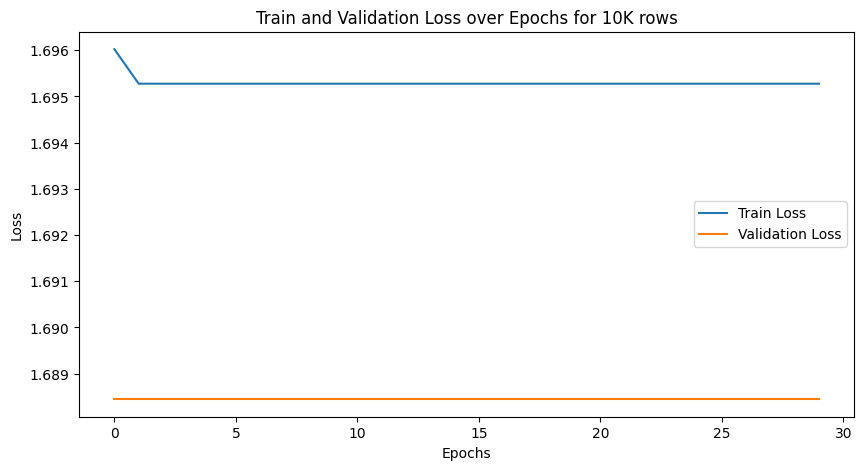

In [23]:
import matplotlib.pyplot as plt

# Plot train_loss and val_loss
plt.figure(figsize=(10, 5))
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss over Epochs for 10K rows')
plt.legend()
plt.show()

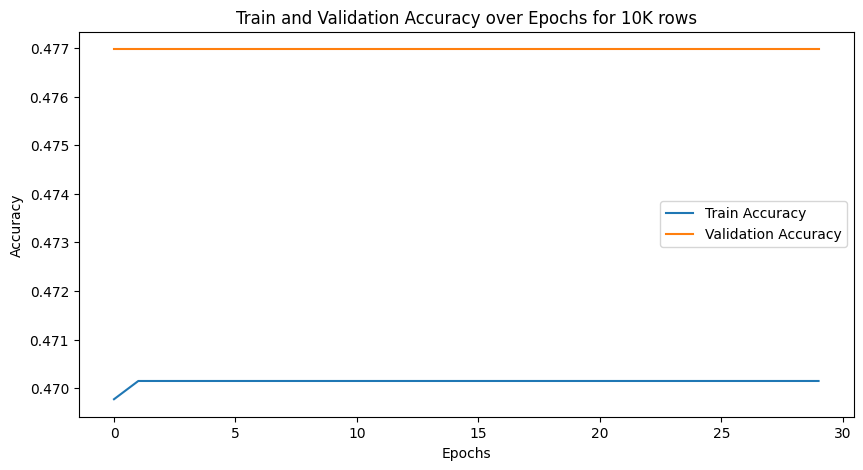

In [24]:
# Plot train_acc and val_acc
plt.figure(figsize=(10, 5))
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy over Epochs for 10K rows')
plt.legend()
plt.show()

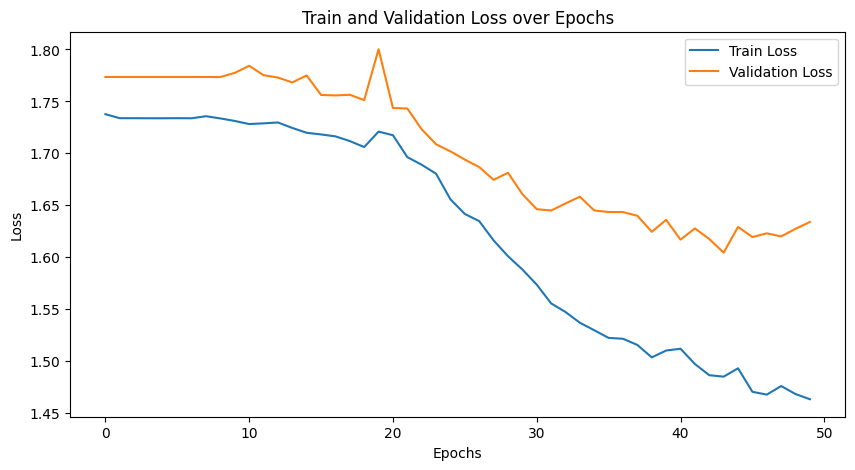

In [30]:
import matplotlib.pyplot as plt

# Plot train_loss and val_loss
plt.figure(figsize=(10, 5))
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss over Epochs')
plt.legend()
plt.show()

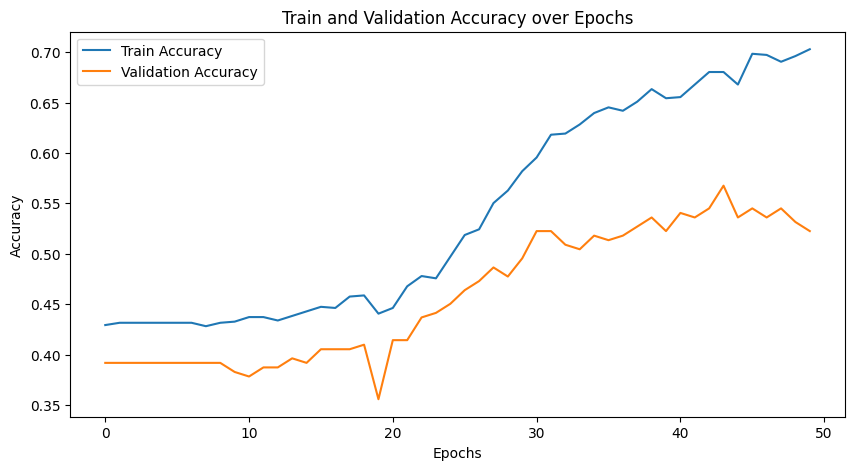

In [31]:
# Plot train_acc and val_acc
plt.figure(figsize=(10, 5))
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy over Epochs')
plt.legend()
plt.show()

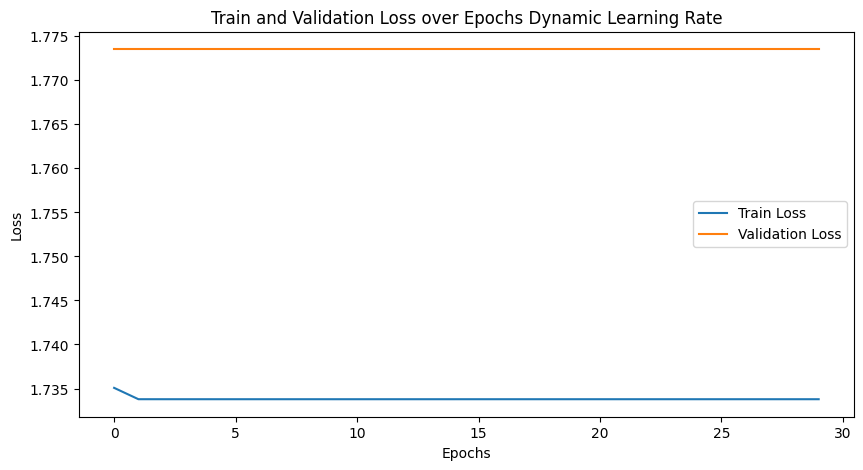

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss over Epochs Dynamic Learning Rate')
plt.legend()
plt.show()

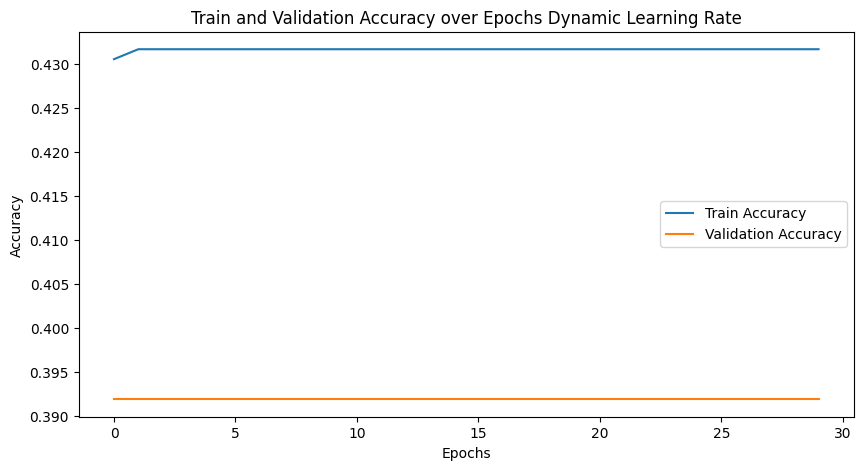

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy over Epochs Dynamic Learning Rate')
plt.legend()
plt.show()